# **Translate**

In [7]:
pip install googletrans==3.1.0a0 --quiet

     |████████████████████████████████| 55 kB 2.1 MB/s 
     |████████████████████████████████| 1.5 MB 9.5 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
     |████████████████████████████████| 65 kB 3.3 MB/s 


In [8]:
# To test how it works
from googletrans import Translator
translator = Translator()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('morocco_scripping_dataset.csv')
df.shape

(1730, 8)

In [13]:
df.columns

Index(['Unnamed: 0', 'Reference_id', 'Category', 'Object_Purchase',
       'Public_Purchase', 'Location', 'Start_date', 'End_date'],
      dtype='object')

In [14]:
# A copy of my database
df_trans = df
len(df)

1730

In [15]:
# to create new columns with the translation inside
# It would take a while, so be patient when runing
french_list = ['Category', 'Object_Purchase', 'Public_Purchase']
for name in french_list : 
  new_name = f'{name}_trans'
  df_trans[new_name] = df_trans[name]
  for i in range(len(df)) : 
    df_trans[new_name][i] = translator.translate(df[name][i], src='fr', dest="en").text

<ipython-input-15-809db813965f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trans[new_name][i] = translator.translate(df[name][i], src='fr', dest="en").text


In [16]:
# to export the data and download it
from google.colab import files
df_trans.to_csv('df_morocco_trans.csv', encoding = 'utf-8-sig') 
files.download('df_morocco_trans.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
df_current = df_trans

In [18]:
import datetime

In [19]:
df_current['End_date'] = pd.to_datetime(df_trans['End_date']).dt.date

In [20]:
datetime_object = datetime.datetime.now()
datetime_object = datetime_object.date()
datetime_object

datetime.date(2022, 12, 17)

In [21]:
df_current['Closed'] = df_current['End_date'] < datetime_object

In [22]:
df_current.head()

,Unnamed: 0,Reference_id,Category,Object_Purchase,Public_Purchase,Location,Start_date,End_date,Category_trans,Object_Purchase_trans,Public_Purchase_trans,Closed
0,0,01/DSP/SAPT/2022,Travaux,APPEL A LA CONCURRENCE POUR LA GESTION DELEGU...,SOCIETE D'AMENAGEMENT POUR LA RECONVERSION DE...,Wilaya de Tanger Assilah,15/11/2022,2023-04-17,Works,CALL FOR COMPETITION FOR THE DELEGATED MANAGEM...,DEVELOPMENT COMPANY FOR THE CONVERSION OF THE ...,False
1,1,1CGD2022,Services,Gestion déléguée du centre de traitement et d...,Commune d'OUJDA,OUJDA-ANGAD,16/12/2022,2023-02-03,Services,Delegated management of the treatment and reco...,Municipality of OUJDA,False
2,2,15/2022/CTSA/F,Fournitures,PRESTATIONS DE REALISATION DE LA 2ème PHASE D...,CASABLANCA TRANSPORT EN SITE AMENAGE SA,CASABLANCA,27/09/2022,2023-02-28,Stationery,SERVICES FOR THE IMPLEMENTATION OF THE 2nd PHA...,CASABLANCA TRANSPORT EN SITE AMENAGE SA,False
3,3,07/2022/DRSMS,Fournitures,EQUIPEMENT DE L’HOPITAL DE PROXIMITE D’IMINTA...,"Directeur Régional de la Santé, région Marrak...",Wilaya de Marrakech Medina,16/12/2022,2023-08-02,Stationery,EQUIPMENT OF THE HOSPITAL OF PROXIMITY OF IMIN...,"Regional Director of Health, Marrakech Safi re...",False
4,4,26139/B3/PIC,Fournitures,la Fourniture de Rails Neufs 60 E1 de 36 ml,OFFICE NATIONAL DES CHEMINS DE FER,KENITRA\nCASABLANCA\n...,15/12/2022,2023-08-02,Stationery,the Supply of New Rails 60 E1 of 36 ml,RAILWAYS NATIONAL OFFICE,False


# **Keywords extraction**

In [23]:
df_current_kw = df_current

In [24]:
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords

In [25]:
colu = ["Object_Purchase", "Public_Purchase"]
for col in colu : 
  new_col = f'{col}_kw_fr'
  df_current_kw[new_col] = df_current_kw[col]
  for i in range(len(df)) : 
    df_current_kw[new_col][i] = keywords(df_current_kw[col][i], words=1, split = True, lemmatize=True)

<ipython-input-25-6824968b1fe3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_kw[new_col][i] = keywords(df_current_kw[col][i], words=1, split = True, lemmatize=True)


In [26]:
df_current_kw[["Object_Purchase_kw_fr", "Public_Purchase_kw_fr"]].head(10)

,Object_Purchase_kw_fr,Public_Purchase_kw_fr
0,[par],[ville]
1,[dechets],[]
2,[poste],[amenage]
3,[lot],[region]
4,[rails],[national]
5,[lumineuse],[deplacements]
6,[des],[national]
7,[lot],[]
8,[pour],[national]
9,[regionaux],[national]


In [27]:
df_current.dtypes

Unnamed: 0                int64
Reference_id             object
Category                 object
Object_Purchase          object
Public_Purchase          object
Location                 object
Start_date               object
End_date                 object
Category_trans           object
Object_Purchase_trans    object
Public_Purchase_trans    object
Closed                     bool
Object_Purchase_kw_fr    object
Public_Purchase_kw_fr    object
dtype: object

# **Variables creation**

In [28]:
df_current['Start_date'] = pd.to_datetime(df_current['Start_date']).dt.date

In [29]:
df_current['Duration'] = df_current['End_date'] - df_current['Start_date']

In [30]:
df_current['Start_month'] = pd.to_datetime(df_current['Start_date']).dt.month

In [31]:
df_current['End_month'] = pd.to_datetime(df_current['End_date']).dt.month

In [32]:
df_current['End_year'] = pd.to_datetime(df_current['End_date']).dt.year

In [33]:
#Converting the numeric variables in release_day to string
mapper = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
df_current['Start_month'] = df_current['Start_month'].map(mapper)

In [34]:
df_current['End_month'] = df_current['End_month'].map(mapper)

In [35]:
df_current.head(10)

,Unnamed: 0,Reference_id,Category,Object_Purchase,Public_Purchase,Location,Start_date,End_date,Category_trans,Object_Purchase_trans,Public_Purchase_trans,Closed,Object_Purchase_kw_fr,Public_Purchase_kw_fr,Duration,Start_month,End_month,End_year
0,0,01/DSP/SAPT/2022,Travaux,APPEL A LA CONCURRENCE POUR LA GESTION DELEGU...,SOCIETE D'AMENAGEMENT POUR LA RECONVERSION DE...,Wilaya de Tanger Assilah,2022-11-15,2023-04-17,Works,CALL FOR COMPETITION FOR THE DELEGATED MANAGEM...,DEVELOPMENT COMPANY FOR THE CONVERSION OF THE ...,False,[par],[ville],153 days,November,April,2023
1,1,1CGD2022,Services,Gestion déléguée du centre de traitement et d...,Commune d'OUJDA,OUJDA-ANGAD,2022-12-16,2023-02-03,Services,Delegated management of the treatment and reco...,Municipality of OUJDA,False,[dechets],[],49 days,December,February,2023
2,2,15/2022/CTSA/F,Fournitures,PRESTATIONS DE REALISATION DE LA 2ème PHASE D...,CASABLANCA TRANSPORT EN SITE AMENAGE SA,CASABLANCA,2022-09-27,2023-02-28,Stationery,SERVICES FOR THE IMPLEMENTATION OF THE 2nd PHA...,CASABLANCA TRANSPORT EN SITE AMENAGE SA,False,[poste],[amenage],154 days,September,February,2023
3,3,07/2022/DRSMS,Fournitures,EQUIPEMENT DE L’HOPITAL DE PROXIMITE D’IMINTA...,"Directeur Régional de la Santé, région Marrak...",Wilaya de Marrakech Medina,2022-12-16,2023-08-02,Stationery,EQUIPMENT OF THE HOSPITAL OF PROXIMITY OF IMIN...,"Regional Director of Health, Marrakech Safi re...",False,[lot],[region],229 days,December,August,2023
4,4,26139/B3/PIC,Fournitures,la Fourniture de Rails Neufs 60 E1 de 36 ml,OFFICE NATIONAL DES CHEMINS DE FER,KENITRA\nCASABLANCA\n...,2022-12-15,2023-08-02,Stationery,the Supply of New Rails 60 E1 of 36 ml,RAILWAYS NATIONAL OFFICE,False,[rails],[national],230 days,December,August,2023
5,5,10/2022,Fournitures,Fourniture et pose de la signalisation lumine...,"Société de développement local "" GRAND AGADIR...",AGADIR IDA OU TANANE,2022-02-12,2023-02-02,Stationery,Supply and installation of tricolor light sign...,"Local development company ""GREAT AGADIR FOR MO...",False,[lumineuse],[deplacements],355 days,February,February,2023
6,6,147/2022/DR9/C,Travaux,Réhabilitation des installations d’AEP d’Al H...,OFFICE NATIONAL DE L'ELECTRICITE ET DE L'EAU ...,AL HOCEIMA,2022-12-14,2023-01-02,Works,Rehabilitation of DWS facilities in Al Hoceima...,NATIONAL OFFICE FOR ELECTRICITY AND DRINKING W...,False,[des],[national],19 days,December,January,2023
7,7,87/2022,Services,Entretien et maintenance de la plateforme mat...,MINISTERE DE L'INTERIEUR,MAROC\nRABAT\n...,2022-12-16,2023-01-02,Services,Upkeep and maintenance of the hardware and sof...,MINISTRY OF THE INTERIOR,False,[lot],[],17 days,December,January,2023
8,8,27121/E1/PM,Fournitures,FOURNITURE DE KIT POUR SYSTEME DE FERMETURE S...,OFFICE NATIONAL DES CHEMINS DE FER,CASABLANCA,2022-08-12,2023-01-02,Stationery,KIT SUPPLY FOR SEMI-AUTOMATIC DOOR CLOSING SYSTEM,RAILWAYS NATIONAL OFFICE,False,[pour],[national],143 days,August,January,2023
9,9,P5518/PV,Fournitures,Fourniture et installation d’un système d’aff...,OFFICE NATIONAL DES CHEMINS DE FER,OUJDA-ANGAD\nNADOR\n...,2022-12-12,2023-01-02,Stationery,Supply and installation of a centralized dynam...,RAILWAYS NATIONAL OFFICE,False,[regionaux],[national],21 days,December,January,2023


# **Category**

In [36]:
df_current['Category'].value_counts()

Services       711
Travaux        674
Fournitures    345
Name: Category, dtype: int64

In [37]:
df_current['Category'].value_counts(normalize=True)*100

Services       41.098266
Travaux        38.959538
Fournitures    19.942197
Name: Category, dtype: float64

In [38]:
import seaborn as sns
#Define Seaborn color palette to use
colors = sns.color_palette("flare")

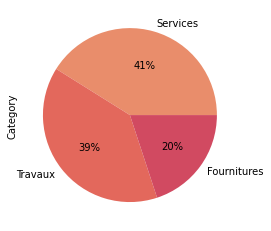

In [39]:
df_current['Category'].value_counts().plot(kind = 'pie', colors = colors, autopct='%.0f%%')
plt.show()

# **Location**

In [56]:
df_current['Location'].value_counts()

RABAT                                 130
CASABLANCA                             99
MARRAKECH                              60
TANGER-ASSILAH\nMDIQ-FNIDEQ\n...       42
TANGER-ASSILAH                         36
                                     ... 
GUELMIM\nTAN-TAN\n...                   1
Province de Sidi Kacem\nMAROC\n...      1
Province d'Al Hoceima                   1
CASABLANCA\nMARRAKECH\n...              1
MAROC\nOUARZAZATE\n...                  1
Name: Location, Length: 235, dtype: int64

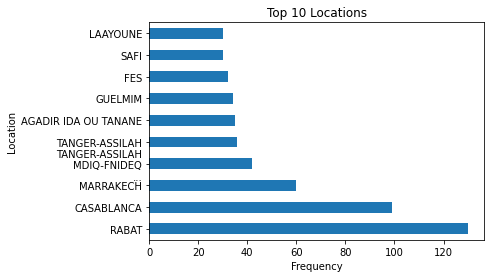

In [41]:
df_current['Location'].value_counts()[:10].plot(kind='barh')
plt.title('Top 10 Locations')
plt.xlabel('Frequency')
plt.ylabel('Location')
plt.show()

# **Duration**

In [42]:
df_current['Duration'].value_counts()

23 days     131
22 days      84
24 days      78
25 days      77
26 days      71
           ... 
204 days      1
369 days      1
81 days       1
86 days       1
5 days        1
Name: Duration, Length: 194, dtype: int64

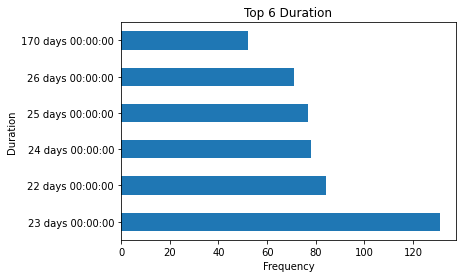

In [43]:
df_current['Duration'].value_counts()[:6].plot(kind='barh')
plt.title('Top 6 Duration')
plt.xlabel('Frequency')
plt.ylabel('Duration')
plt.show()

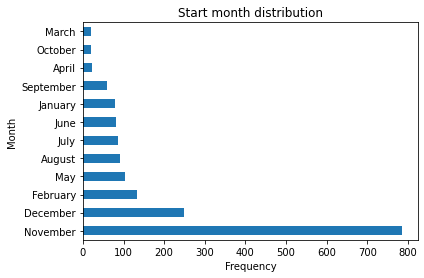

In [57]:
df_current['Start_month'].value_counts().plot(kind='barh')
plt.title('Start month distribution')
plt.xlabel('Frequency')
plt.ylabel('Month')
plt.show()

In [45]:
df_current['Duration'].describe()

count                           1730
mean     139 days 23:27:32.254335260
std      125 days 06:33:52.676242986
min                  4 days 00:00:00
25%                 26 days 00:00:00
50%                108 days 12:00:00
75%                232 days 00:00:00
max                688 days 00:00:00
Name: Duration, dtype: object

In [46]:
df_current.groupby('Start_month')['Category'].value_counts()

Start_month  Category   
April        Services         9
             Fournitures      7
             Travaux          7
August       Services        42
             Travaux         36
             Fournitures     13
December     Travaux        114
             Services        83
             Fournitures     52
February     Services        62
             Travaux         54
             Fournitures     16
January      Services        30
             Travaux         30
             Fournitures     20
July         Services        34
             Travaux         33
             Fournitures     19
June         Services        38
             Travaux         25
             Fournitures     19
March        Services         8
             Travaux          6
             Fournitures      5
May          Travaux         50
             Services        38
             Fournitures     16
November     Services       329
             Travaux        295
             Fournitures    161
October      Se

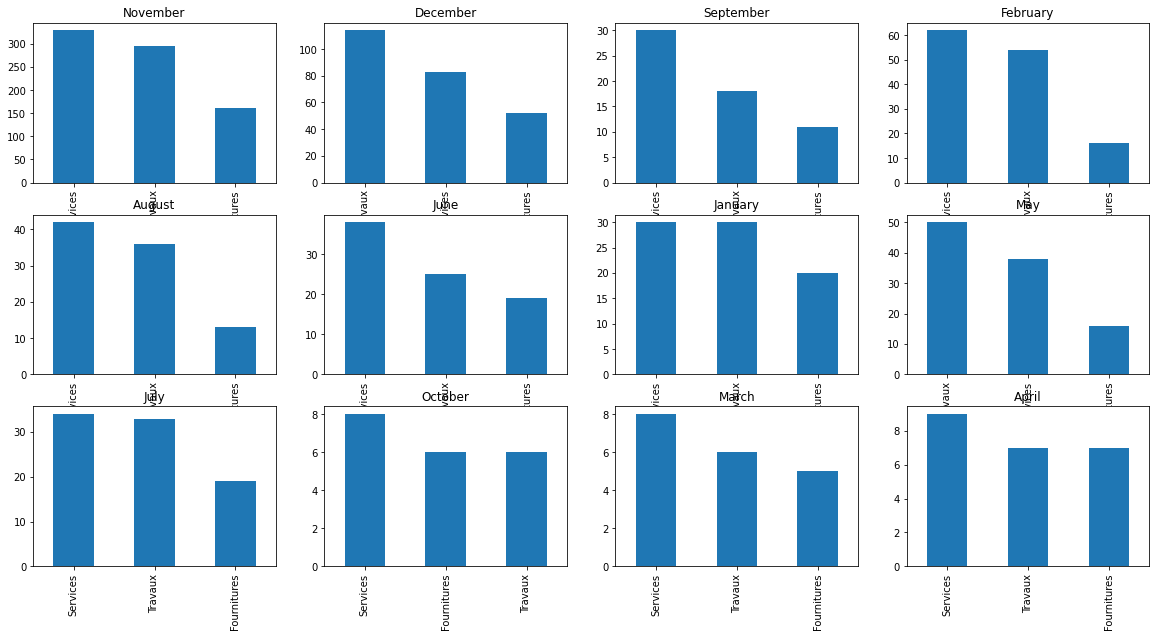

In [47]:
i = 1
plt.figure(figsize = (20,10))
for month in df_current['Start_month'].unique() :
  plt.subplot(3,4,i)
  df_current[df_current['Start_month'] == month]['Category'].value_counts().plot(kind='bar')
  plt.title(month)
  i = i + 1
plt.show()

# **Closed offers**

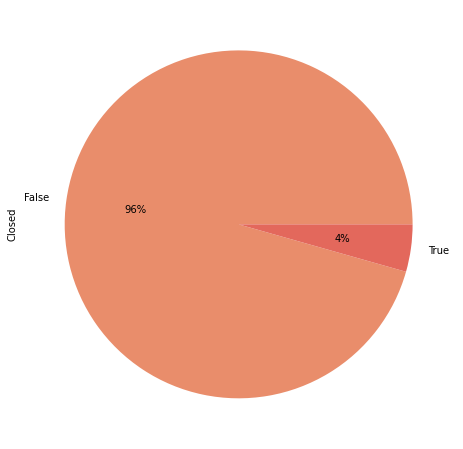

In [48]:
plt.figure(figsize=(10,8))
df_current['Closed'].value_counts().plot(kind='pie', colors=colors, autopct='%.0f%%')
plt.show()

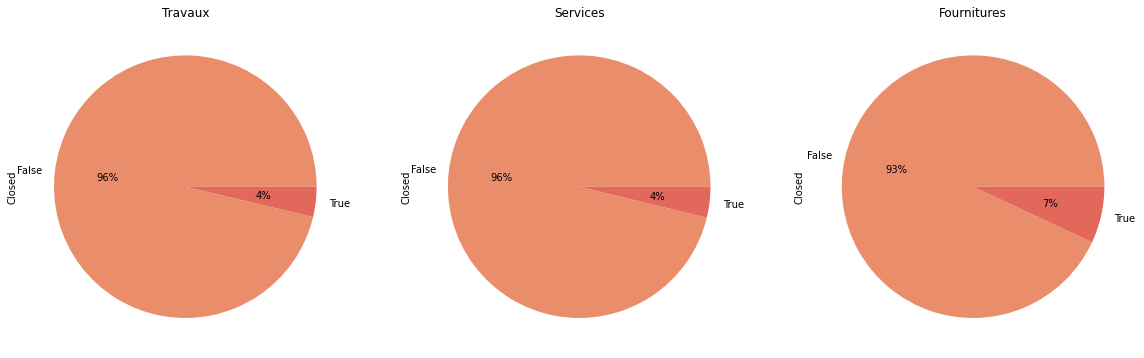

In [49]:
i = 1
plt.figure(figsize = (20,10))
for cat in df_current['Category'].unique() :
  plt.subplot(1,3,i)
  df_current[df_current['Category'] == cat]['Closed'].value_counts().plot(kind='pie', colors=colors, autopct='%.0f%%')
  plt.title(cat)
  i = i + 1
plt.show()

In [50]:
df_current['Location'][df['Closed']==True].value_counts()[:10]

RABAT                               9
MARRAKECH                           6
TANGER-ASSILAH\nMDIQ-FNIDEQ\n...    5
KHOURIBGA                           3
MAROC\nKHENIFRA\n...                3
TANGER-ASSILAH                      3
SALE                                2
SIDI SLIMANE                        2
CASABLANCA                          2
SETTAT                              2
Name: Location, dtype: int64

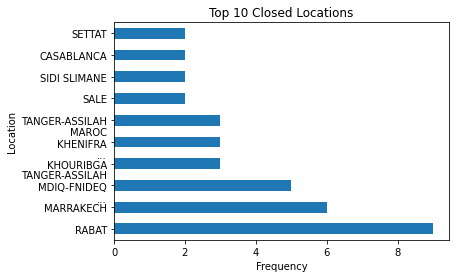

In [51]:
df_current['Location'][df['Closed']==True].value_counts()[:10].plot(kind='barh')
plt.title('Top 10 Closed Locations')
plt.xlabel('Frequency')
plt.ylabel('Location')
plt.show()

# **End month**

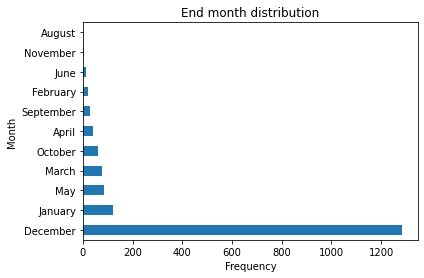

In [52]:
df_current['End_month'].value_counts().plot(kind='barh')
plt.title('End month distribution')
plt.xlabel('Frequency')
plt.ylabel('Month')
plt.show()

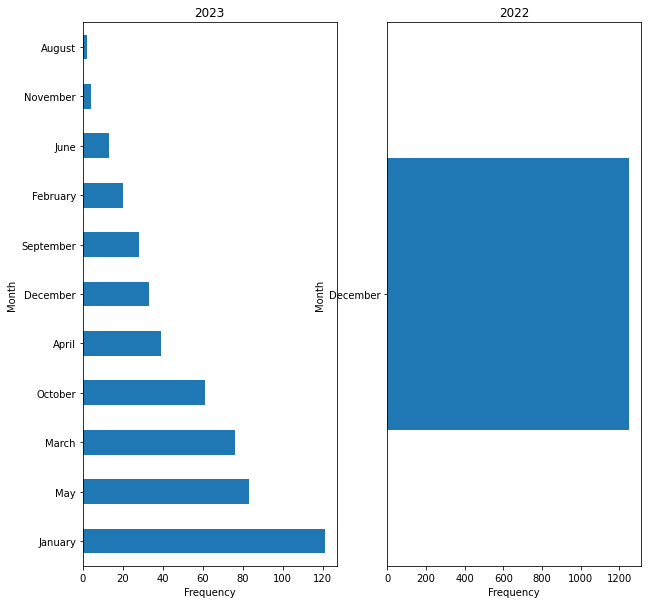

In [55]:
plt.figure(figsize=(10,10))
i = 1
for year in df_current['End_year'].unique():
  plt.subplot(1,2,i)
  df_current['End_month'][df_current['End_year'] == year].value_counts().plot(kind='barh')
  plt.title(year)
  plt.xlabel('Frequency')
  plt.ylabel('Month')
  i+=1
plt.show()

In [54]:
# to export the data and download it
from google.colab import files
df_current.to_csv('Final_morocco_after_EDA.csv', encoding = 'utf-8-sig') 
files.download('Final_morocco_after_EDA.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>